## Content
#### There are 13 attributes

age: age in years  
sex: sex (1 = male; 0 = female)  
cp: chest pain type  
- Value 0: typical angina  
- Value 1: atypical angina  
- Value 2: non-anginal pain
- Value 3: asymptomatic
trestbps: resting blood pressure (in mm Hg on admission to the hospital)  
chol: serum cholestoral in mg/dl  
fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)  
restecg: resting electrocardiographic results  
- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach: maximum heart rate achieved  
exang: exercise induced angina (1 = yes; 0 = no)  
oldpeak = ST depression induced by exercise relative to rest  
slope: the slope of the peak exercise ST segment  
- Value 0: upsloping
- Value 1: flat
- Value 2: downsloping
ca: number of major vessels (0-3) colored by flourosopy  
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect  
and the label  
condition: 0 = no disease, 1 = disease  

In [17]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_path = "../data/heart_cleveland_upload.csv"

In [5]:
df = pd.read_csv(data_path)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [113]:
CAT_FEATURES = [
    "sex",
    "fbs", 
    "restecg",
    "exang",
    "slope",
    "ca",
    "thal",
    "condition"
]

NUM_FEATURES = [
    "age", 
    "cp",
    "trestbps",
    "chol",
    "thalach",
    "oldpeak"
]

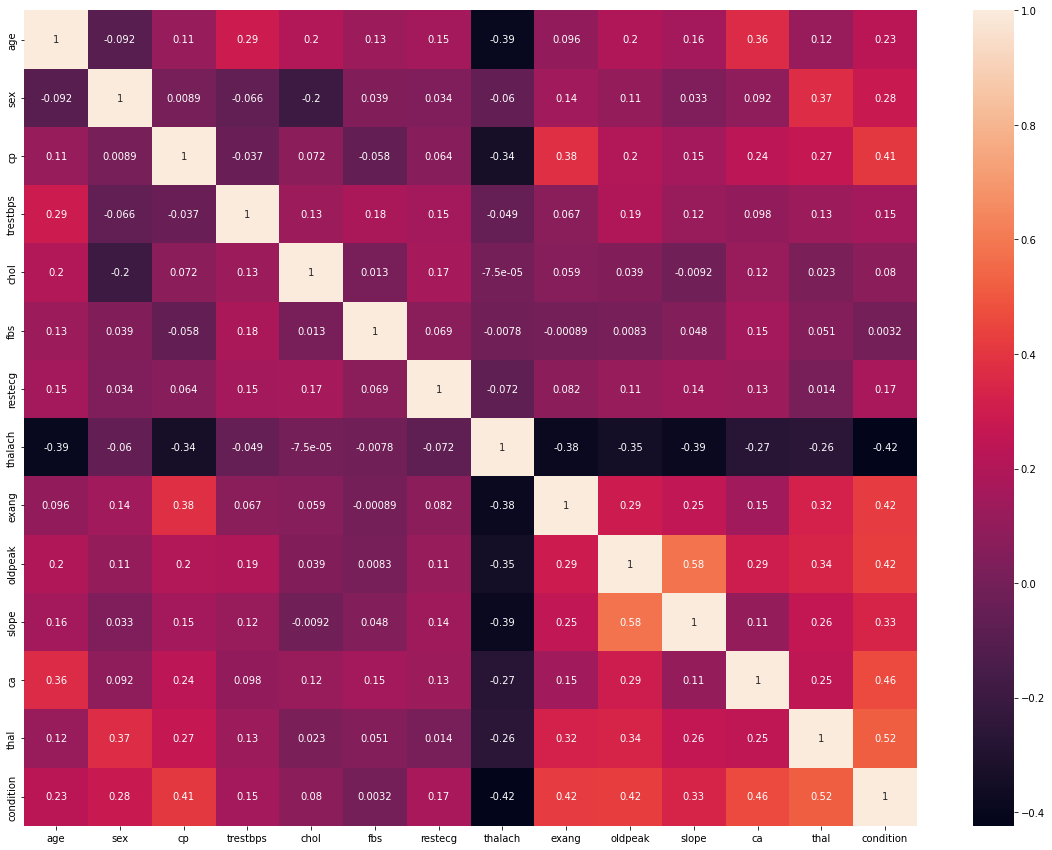

In [24]:
plt.rcParams["figure.figsize"] = (20, 15)
sns.heatmap(df.corr(), annot=True);

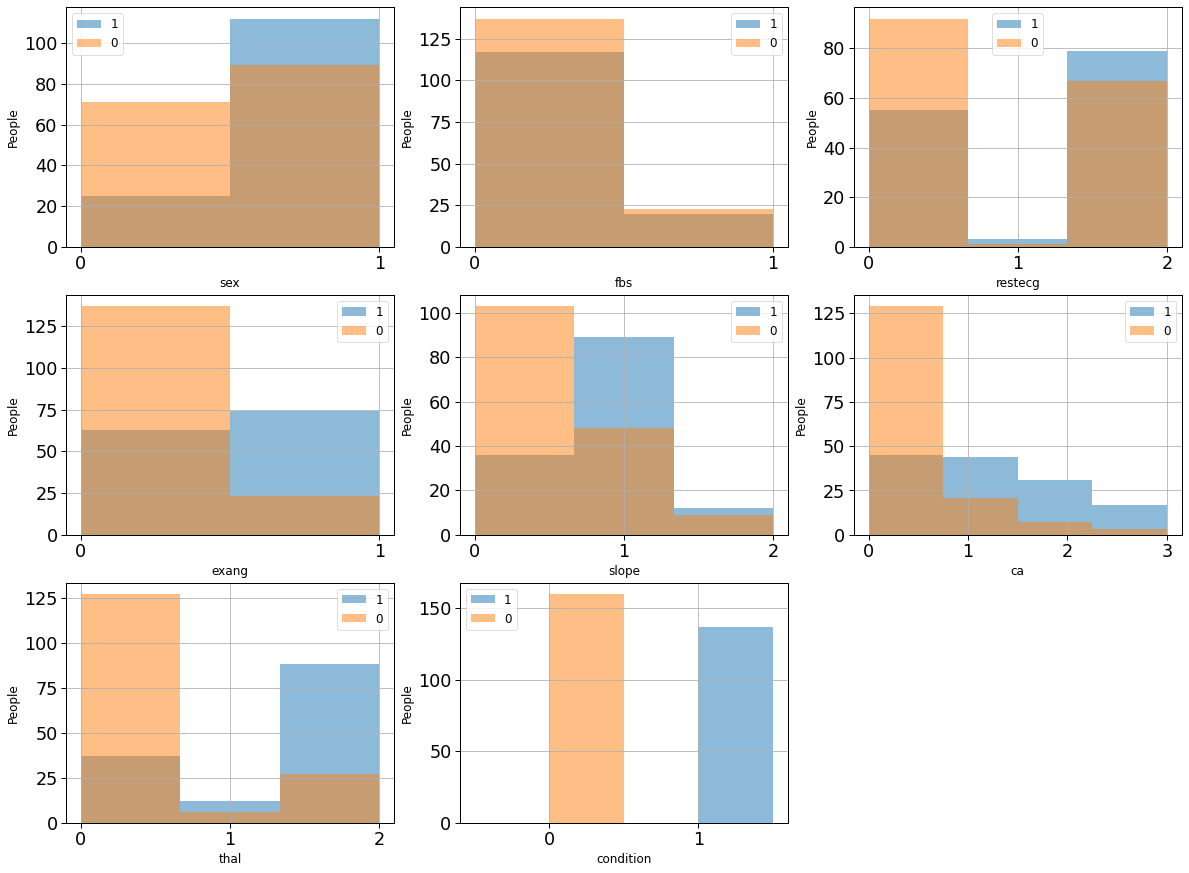

In [132]:
plt.rcParams["figure.figsize"] = (20, 15)
index = 1
for cat in CAT_FEATURES:
    plt.subplot(3, 3, index)
    bins = len(df[cat].unique())
    df[df["condition"] == 1][cat].hist(bins=bins, label="1", alpha=0.5)
    df[df["condition"] == 0][cat].hist(bins=bins, label="0", alpha=0.5)
    plt.xlabel(cat, fontsize=12)
    plt.ylabel("People", fontsize=12)
    plt.xticks(sorted(df[cat].unique()))
    plt.legend(fontsize=12)
    index += 1

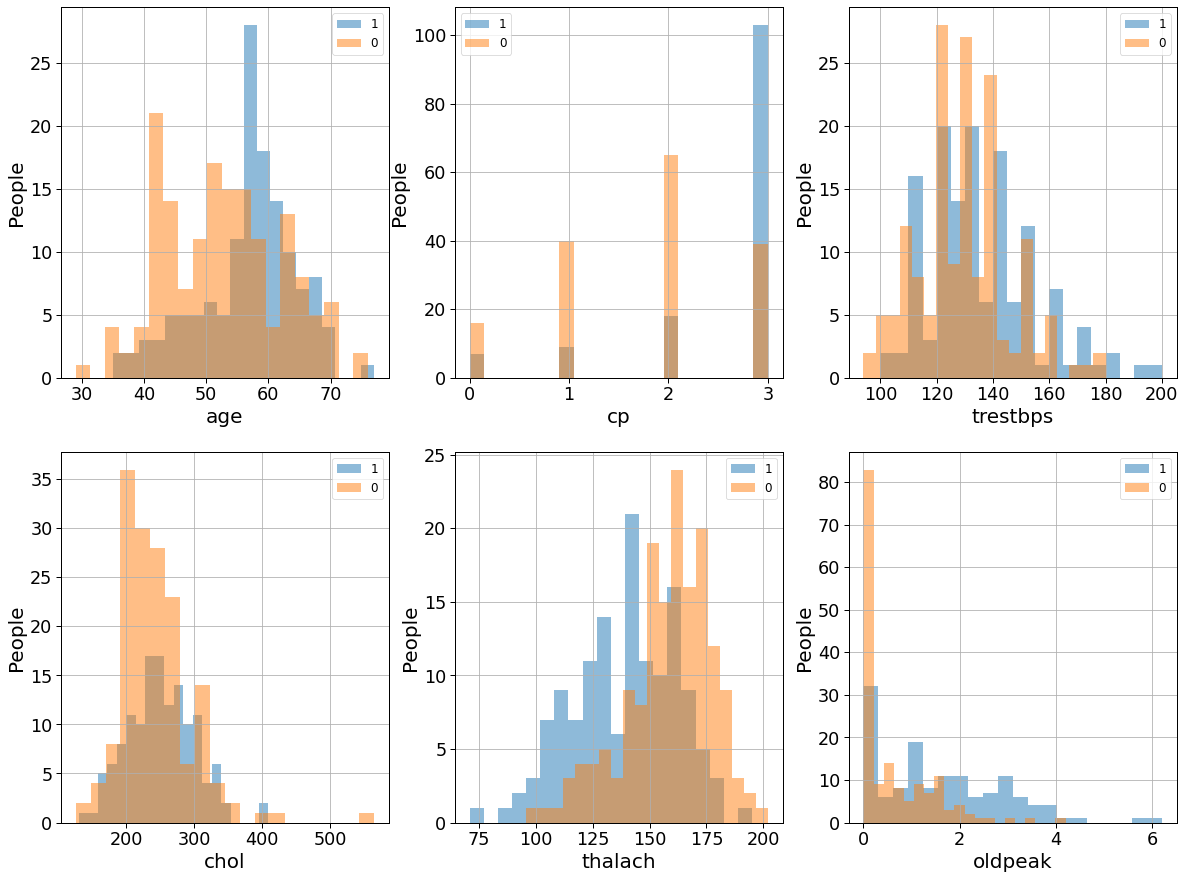

In [118]:
plt.rcParams["figure.figsize"] = (20, 15)
index = 1
for num in NUM_FEATURES:
    plt.subplot(2, 3, index)
    df[df["condition"] == 1][num].hist(bins=20, label="1", alpha=0.5)
    df[df["condition"] == 0][num].hist(bins=20, label="0", alpha=0.5)
    plt.legend(fontsize=12)
    plt.xlabel(num)
    plt.ylabel("People")
    index += 1

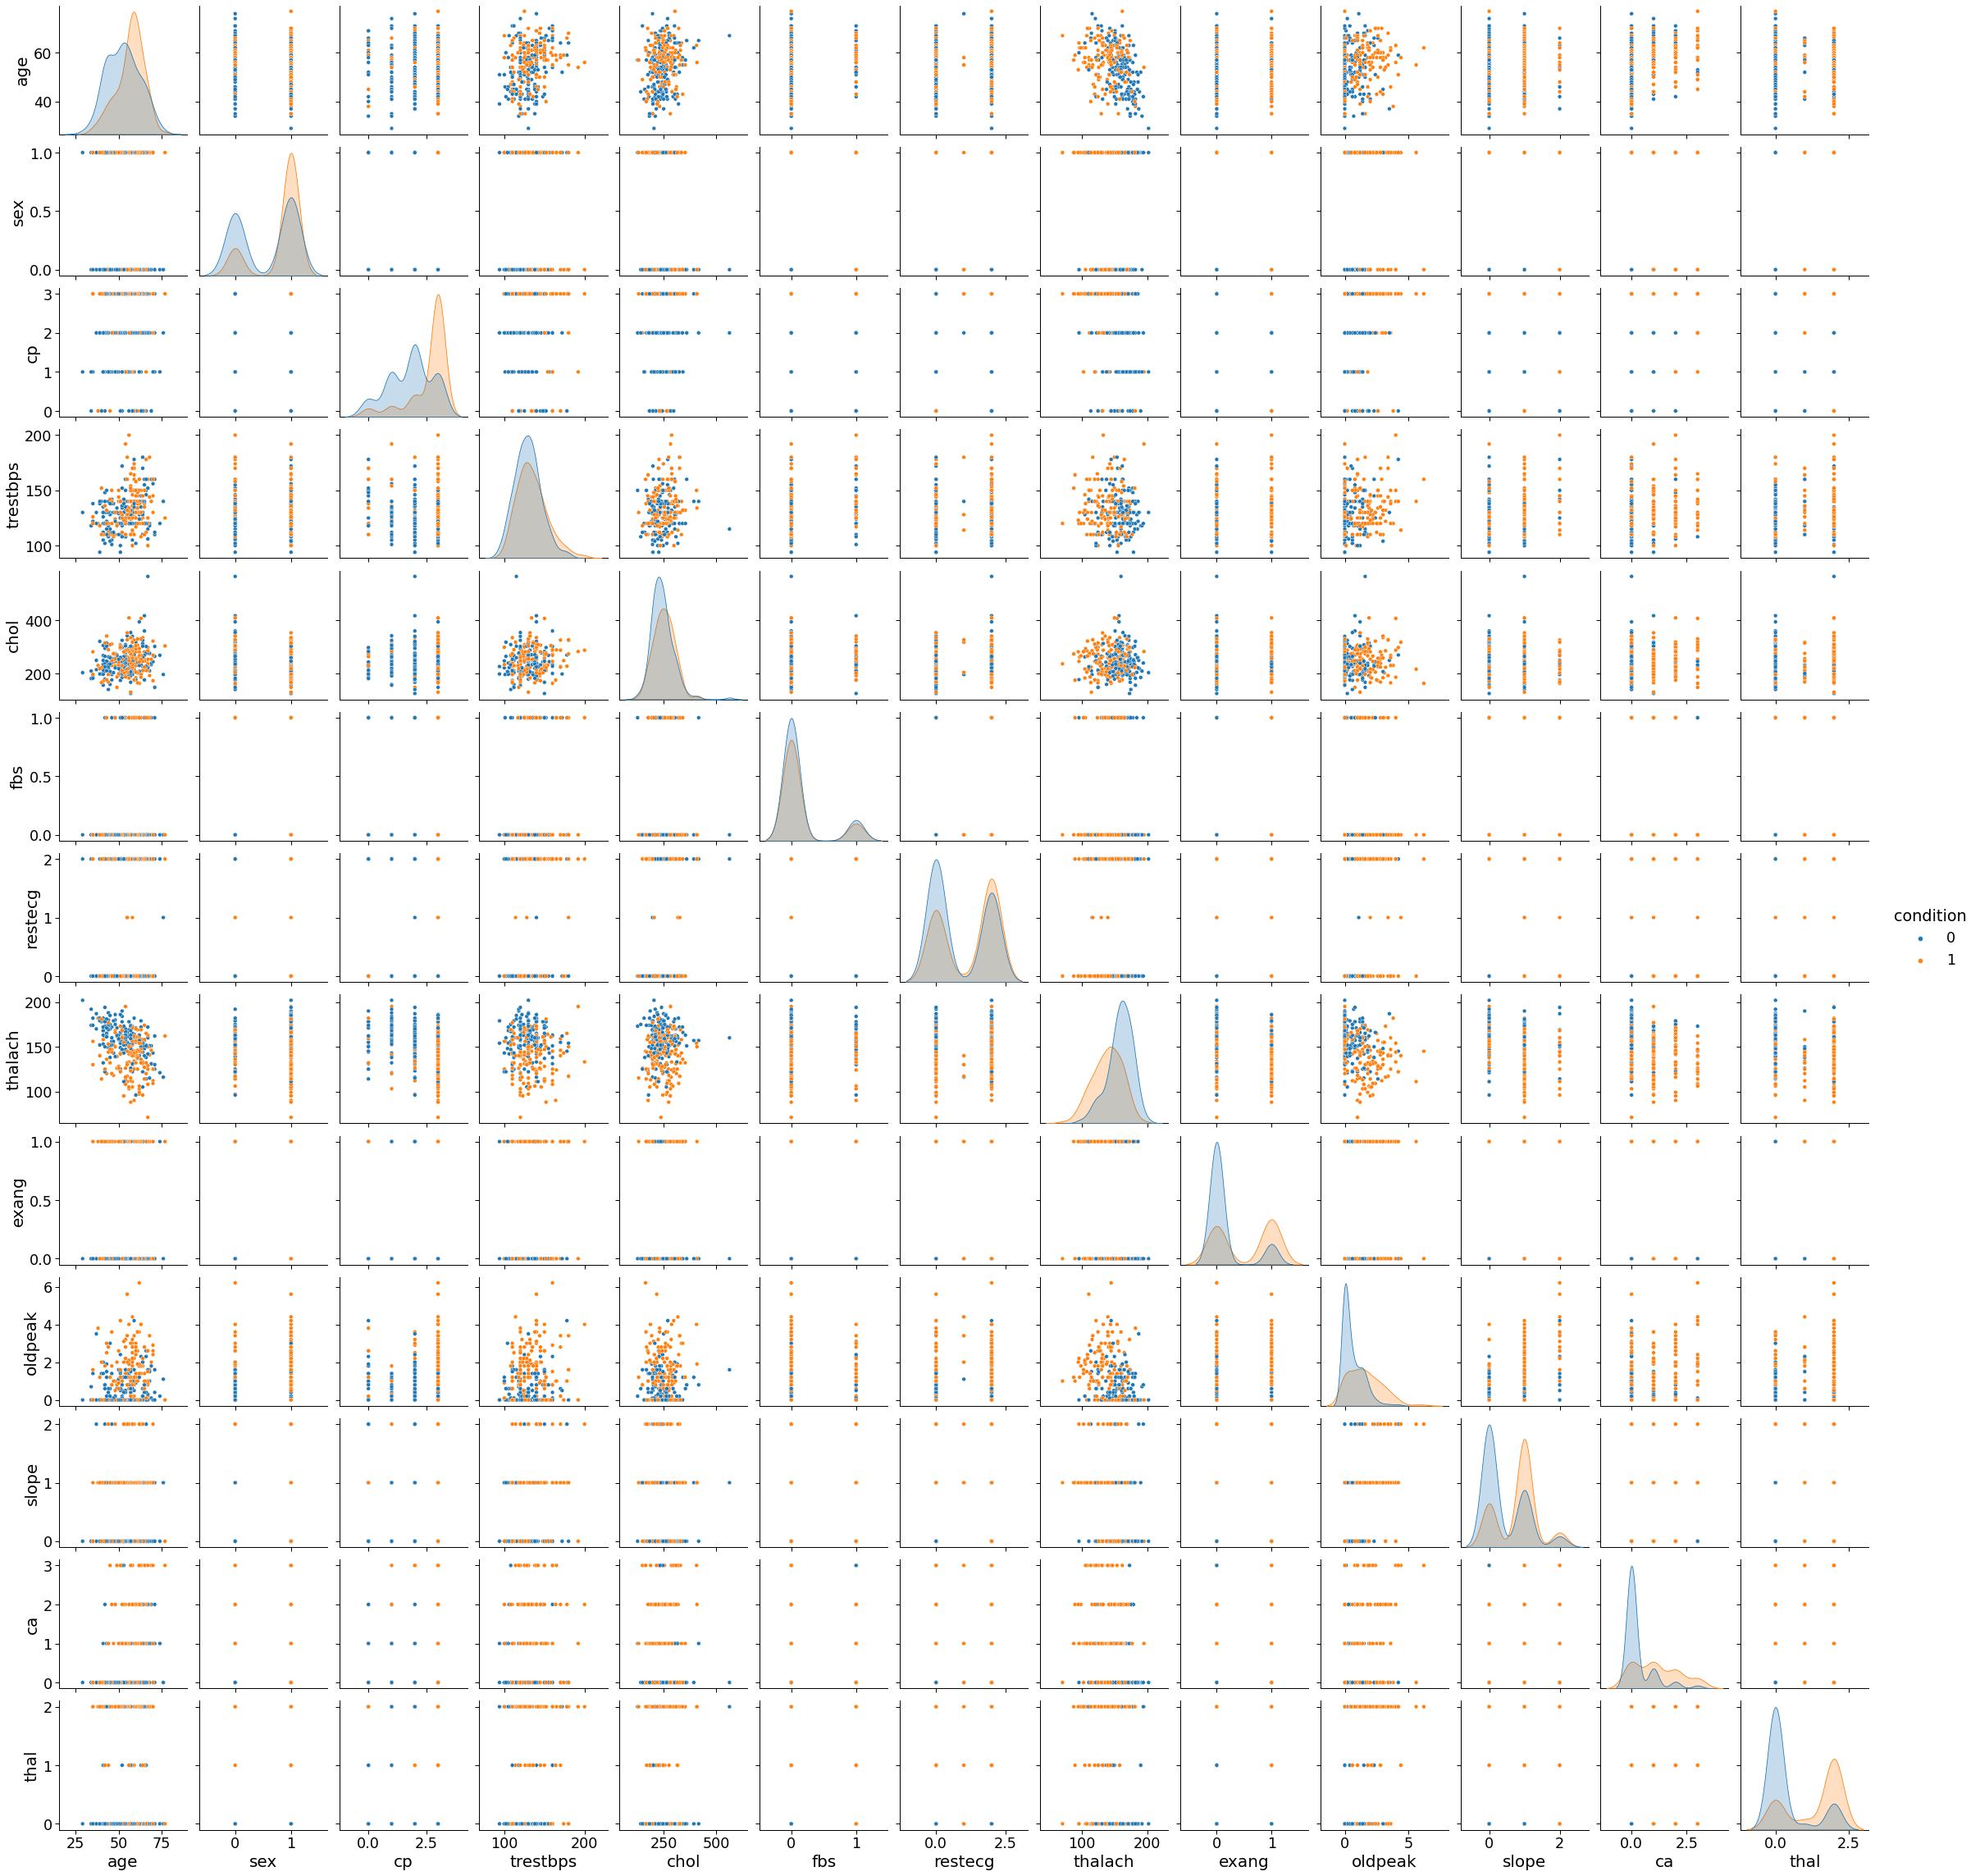

In [121]:
plt.rcParams["figure.figsize"] = (20, 20)
sns.pairplot(
    df,
    hue="condition"
)

<AxesSubplot:xlabel='condition', ylabel='age'>

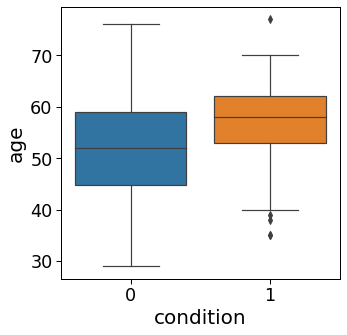

In [125]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='condition', y='age', data=df)

<AxesSubplot:xlabel='condition', ylabel='age'>

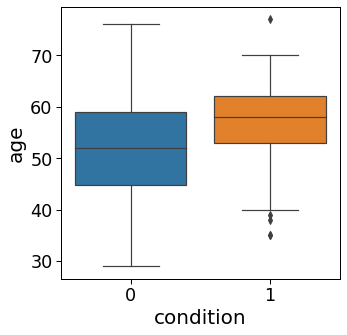

In [126]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='condition', y='age', data=df)

<AxesSubplot:xlabel='condition', ylabel='age'>

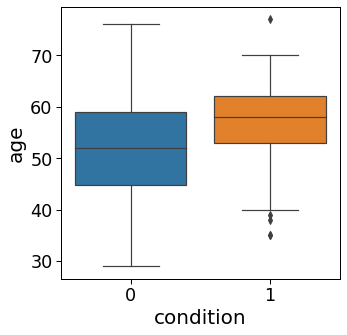

In [127]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='condition', y='age', data=df)

In [ ]:
# People with heart disease have some outliers int numerical data
# Males have higher chance to have a heart disease
# Elderly people higher chance to have a heart disease 
# High chest pain is correlating with a higher chance to have a heart disease 